In [432]:
import csv
import shapefile
import shapely.geometry as geom
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl

import math
import numpy as np
from numpy import linalg as la
import statistics as stat

import ternary
from ternary.helpers import simplex_iterator

In [431]:
COUNTY_RESULTS = {}
with open("PA/PA_COUNTY_RESULTS.csv",'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        COUNTY_RESULTS[row["County"].capitalize()] = row
print(COUNTY_RESULTS['Allegheny'])

{'TRUMP, DONALD J': '257488', 'County': 'ALLEGHENY', 'CASTLE, DARRELL L': '1793', 'STEIN, JILL': '5021', 'JOHNSON, GARY E': '15854', 'CLINTON, HILLARY': '363017'}


In [430]:
CLINTON = 'CLINTON, HILLARY'
TRUMP = 'TRUMP, DONALD J'

In [3]:
sf = shapefile.Reader("PA/tl_2011_us_county/tl_2011_us_county")
COUNTY_SHAPES = {}
iter = sf.iterShapeRecords()
for i in iter:
    if i.record[0] == '42':
        s = geom.shape(i.shape)
        COUNTY_SHAPES[i.record[4].capitalize()]=s
        print(i.record[4].capitalize(),s.area)

[('DeletionFlag', 'C', 1, 0),
 ['STATEFP', 'C', 2, 0],
 ['COUNTYFP', 'C', 3, 0],
 ['COUNTYNS', 'C', 8, 0],
 ['GEOID', 'C', 5, 0],
 ['NAME', 'C', 100, 0],
 ['NAMELSAD', 'C', 100, 0],
 ['LSAD', 'C', 2, 0],
 ['CLASSFP', 'C', 2, 0],
 ['MTFCC', 'C', 5, 0],
 ['CSAFP', 'C', 3, 0],
 ['CBSAFP', 'C', 5, 0],
 ['METDIVFP', 'C', 5, 0],
 ['FUNCSTAT', 'C', 1, 0],
 ['ALAND', 'N', 14, 0],
 ['AWATER', 'N', 14, 0],
 ['INTPTLAT', 'C', 11, 0],
 ['INTPTLON', 'C', 12, 0]]

In [258]:
VOTERS = {}
with open("PA/pa_registerd_voters_county.csv",'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        VOTERS[row["County"].capitalize()] = row
VOTERS['Allegheny']

{'ALL': '924573',
 'County': 'ALLEGHENY',
 'DEM': '539866',
 'ID#': '2291',
 'NOF': '72740',
 'OTH': '52444',
 'REP': '259523'}

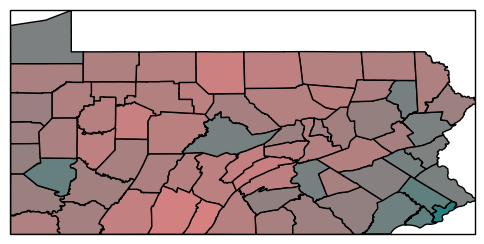

In [13]:
ax = plt.axes(projection=ccrs.PlateCarree())

counties = []
names = []
for k,v in COUNTY_SHAPES.items():
    meta = dict(COUNTY_RESULTS[k])
    del meta["County"]
    total = sum([int(f) for f in meta.values()])
    color = (int(meta["TRUMP, DONALD J"])/total,0.5,0.5)
    #print(k, total, meta["TRUMP, DONALD J"], color)
    counties.append(v)
    names.append(k)
    cf = cfeature.ShapelyFeature([v], ccrs.PlateCarree())
    ax.add_feature(cf, facecolor=color)

    
ax.set_extent([-80.5198510000000027,-74.7215190000000007,39.7211469999999949,42.5160720000000012])
ax.set_aspect(1)

plt.show()

28281236.1447 27698.6789508
sm: Erie (0.95940023310044231, 0.97840830578523519, 0.9970472896800322, 1.0) (0.95940023310044231, 0.97840830578523519, 0.9970472896800322, 1.0)
Erie 432893.4422895821
sm: Columbia (0.96247597301707544, 0.9803767793318805, 0.9980315264533548, 1.0) (0.96247597301707544, 0.9803767793318805, 0.9980315264533548, 1.0)
Columbia 300310.6193080893
sm: Crawford (0.96555171293370867, 0.9823452528785257, 0.9990157632266774, 1.0) (0.96555171293370867, 0.9823452528785257, 0.9990157632266774, 1.0)
Crawford 183692.81206881598
sm: Beaver (0.94402153351727658, 0.96856593805200908, 0.99212610581341909, 1.0) (0.94402153351727658, 0.96856593805200908, 0.99212610581341909, 1.0)
Beaver 927037.5047371188
sm: Luzerne (0.9470972734339097, 0.97053441159865439, 0.99311034258674169, 1.0) (0.9470972734339097, 0.97053441159865439, 0.99311034258674169, 1.0)
Luzerne 815188.491992486
sm: Lycoming (0.96555171293370867, 0.9823452528785257, 0.9990157632266774, 1.0) (0.96555171293370867, 0.9823

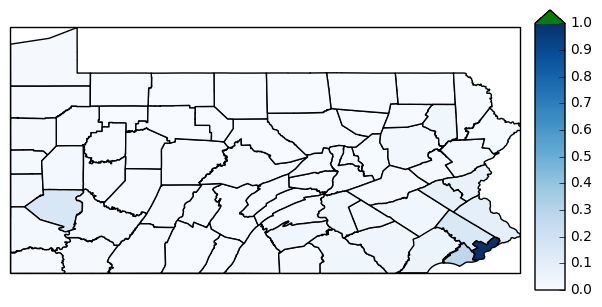

In [18]:
fig = plt.figure()#figsize=(8, 3))
ax = fig.add_axes([0.05, 0.05, 0.85, 0.9], projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.925, 0.15, 0.05, 0.7])

# ax = plt.axes(projection=ccrs.PlateCarree())
colormap = cm.get_cmap("Blues")
colormap.set_bad('orange')
colormap.set_over('g')
colormap.set_under('k')

norm = colors.Normalize()

to_plot = []
for county,v in COUNTY_SHAPES.items():
    vap = int(dict(VOTERS[county])["ALL"])
    value = vap/v.area
    to_plot.append((v,value))

norm.autoscale_None([k[1] for k in to_plot])
print(norm.vmax, norm.vmin)

sm = cm.ScalarMappable(norm=norm, cmap=colormap)

for k,v in COUNTY_SHAPES.items():
    meta = dict(COUNTY_RESULTS[k])
#     del meta["County"]
#     total = sum([int(f) for f in meta.values()])
    vap = int(dict(VOTERS[k])["ALL"])
    value = vap/v.area
#     color = colormap(value)
    color = sm.to_rgba(value)
    print("sm:", k,sm.to_rgba(value), color)
    if value > 1:
        print(k, value)
    cf = cfeature.ShapelyFeature([v], ccrs.PlateCarree())
    ax.add_feature(cf, facecolor=color)

ax.set_extent([-80.5198510000000027,-74.7215190000000007,39.7211469999999949,42.5160720000000012])
ax.set_aspect(1)

cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=colormap, norm=colors.Normalize(vmin=0, vmax=1), extend='max')

plt.show()

Greene 1.0274812178726769


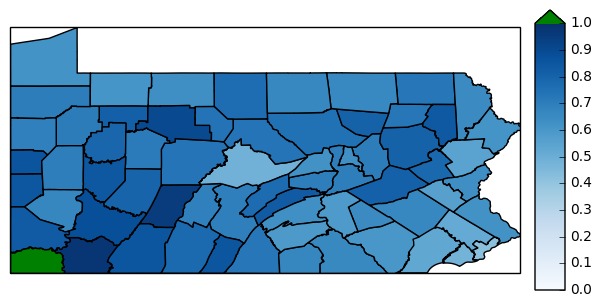

In [11]:
fig = plt.figure()#figsize=(8, 3))
ax = fig.add_axes([0.05, 0.05, 0.85, 0.9], projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.925, 0.15, 0.05, 0.7])

# ax = plt.axes(projection=ccrs.PlateCarree())
colormap = cm.get_cmap("Blues")
colormap.set_bad('orange')
colormap.set_over('g')
colormap.set_under('k')

# values = []
# for county,v in COUNTY_RESULTS.items():
#     meta = dict(COUNTY_RESULTS[k])
#     del meta["County"]
#     total = sum([int(f) for f in meta.values()])
#     vap = int(dict(VOTERS[k])["ALL"])
#     value = int(meta["TRUMP, DONALD J"])/sum([int(VOTERS[k]["REP"]), int(VOTERS[k]["OTH"]), int(VOTERS[k]["NOF"])])

for k,v in COUNTY_SHAPES.items():
    meta = dict(COUNTY_RESULTS[k])
#     del meta["County"]
#     total = sum([int(f) for f in meta.values()])
    vap = int(dict(VOTERS[k])["ALL"])
#     color = total/vap
    value = int(meta["CLINTON, HILLARY"])/int(VOTERS[k]["DEM"])
    value = int(meta["TRUMP, DONALD J"])/sum([int(VOTERS[k]["REP"]), int(VOTERS[k]["OTH"]), int(VOTERS[k]["NOF"])])
    color = colormap(value)
    if value > 1:
        print(k, value)
    cf = cfeature.ShapelyFeature([v], ccrs.PlateCarree())
    ax.add_feature(cf, facecolor=color)

ax.set_extent([-80.5198510000000027,-74.7215190000000007,39.7211469999999949,42.5160720000000012])
ax.set_aspect(1)

cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=colormap, norm=colors.Normalize(vmin=0, vmax=1), extend='max')

plt.show()

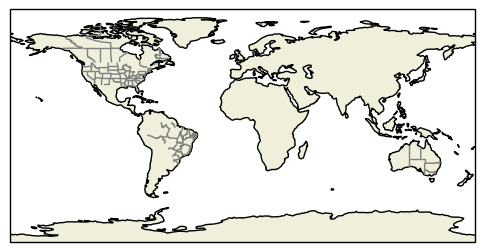

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText


ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([80, 170, -45, 30])

# Put a background image on for nice sea rendering.
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')

# Add a text annotation for the license information to the
# the bottom right corner.
text = AnchoredText(r'$\mathcircled{{c}}$ {}; license: {}'
                    ''.format(SOURCE, LICENSE),
                    loc=4, prop={'size': 12}, frameon=True)
# ax.add_artist(text)

plt.show()

In [24]:
sum([int(k["ALL"]) for k in VOTERS.values()])
print([(k,y) for k,y in zip(range(10), range(10))])

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


In [590]:
def plot_cmap(cmap, vmax=100, filter=lambda x,y: x+y <= 100, foo=1):
    n=(vmax+1)//foo
    xs = np.linspace(0, vmax, n)
    xv, yv = np.meshgrid(xs, xs)
    colors = np.zeros([n,n]).tolist()
    grid = np.dstack((xv, yv))
    ps = []
    for i in range(n):
        for j in range(n):
            x,y = (xv[j,i], yv[j,i])
            if filter(x,y):
                res = cmap((x,y))
                if res is None or np.any(np.isnan(res)):
                    res = (0,0,0)
                if np.any(np.isnan(res)):
                    print((x,y), res)
                colors[j][i] = res
            else:
                colors[j][i] = (0,0,0)
#     print(colors)
    plt.imshow(colors, origin='lower')
    plt.show()

[0.11814602960478812, 0.4409269851976059, 0.4409269851976059]


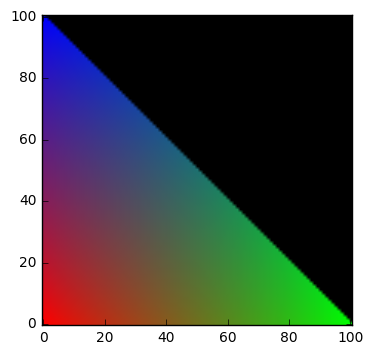

In [446]:
A = (1,0,0)
B = (0,1,0)
C = (0,0,1)
points = [(0,0), (100,0), (50,50*math.sqrt(3))]
values = [(1,0,0), (0,1,0), (0,0,1)]
def value_fraction(v, f):
    x,y,z=v
    return (x*f, y*f, z*f)

def xform(p):
    return (p[0]+p[1]/2, p[1]*math.sqrt(3)/2)

def tpi(p):
    p_p = xform(p)
    distances = [100-math.sqrt((p_p[0]-c[0])**2+(p_p[1]-c[1])**2) for c in points]
    norm_dist = [k/sum(distances) for k in distances]
    colors = [value_fraction(v, f) for v,f in zip(values, norm_dist)]
    return [sum(x) for x in zip(*colors)]
# print([sum(x) for x in zip(*tpi((80,0)))])
print(tpi([50,50]))

plot_cmap(tpi)

In [67]:
t = np.dtype([('x', float), ('y', float)])
a = np.array([(1,2), (3,4)], dtype=t)
a[1]['x']

3.0

In [91]:
import math
a = np.array([[0,0,1], [100,0,1], [0,100,1]])
b = np.array([[10,0], [100,0], [50, 50*math.sqrt(3)]])
x = np.linalg.solve(a, b)
print([k for k in x.flat])

[0.90000000000000002, 0.0, 0.40000000000000002, 0.8660254037844386, 10.0, 0.0]


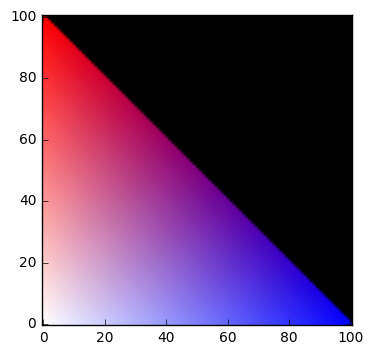

In [517]:
# generate corners of regular n-poly centered at 0,0
def poly_corners(n):
    step = 2*math.pi/n
    return np.array([[math.cos(step*i), math.sin(step*i)] for i in range(n)])

def regular_simplex(n):
    # TODO: implement general approach to compute regular n-simplex
    # https://en.wikipedia.org/wiki/Simplex#Cartesian_coordinates_for_regular_n-dimensional_simplex_in_Rn
    if n==3: return poly_corners(3)
    if n==4: return np.array([
                [1,0,0],
                [-1/3,math.sqrt(8)/3,0],
                [-1/3,-math.sqrt(2)/3,math.sqrt(2/3)],
                [-1/3,-math.sqrt(2)/3,-math.sqrt(2/3)]
                             ])
    if n==5: return np.array([
                [1,0,0,0],
                [-1/4,math.sqrt(15)/4,0,0],
                [-1/4,-math.sqrt(15)/12,math.sqrt(10/12),0],
                [-1/4,-math.sqrt(15)/12,-math.sqrt(30)/12,-math.sqrt(10)/4],
                [-1/4,-math.sqrt(15)/12,-math.sqrt(30)/12,math.sqrt(10)/4]
                             ])

def homogenize(points, out_dim):
    n = len(points)
    res = np.array(points)
    in_dim = len(points[0])
    if in_dim < out_dim:
        res = np.concatenate((res, np.zeros((n,out_dim-in_dim))), axis=1)
    return np.concatenate((res,np.ones((n,1))), axis=1)

def project(a,b):
    a_ = np.array(a)
    b_ = np.array(b)
    return np.dot(a_.T,b_)/np.dot(a_.T,a_)*a_

def gen_cmap(points, colors, lower=0):
    n = len(points)
    a = homogenize(points,n-1)
    b = regular_simplex(n)
#     b = poly_corners(n)
#     print(n,a,b)
#     x = la.solve(a,b)
    x = la.lstsq(a,b)[0]
#     print(x, np.dot(a,x), b)
#     max_dist = la.norm(b[0]-b[1])
    max_dist = la.norm(project(-b[0], b[1]-b[0]))
#     print(max_dist)
    def cmap(ps):
        if len(np.array(ps).shape) == 1:
            ps = [ps]
        a = homogenize(ps,n-1)
#         print(a, x)
        nps = np.dot(a,x)
#         print(nps)
#         distances = [[max(max_dist-la.norm(p-c),0) for c in b] for p in nps]
        distances = [[max(max_dist-la.norm(project(-c, p-c)), 0) for c in b] for p in nps]
        norm_dist = [np.array(k)/sum(k) for k in distances]
        out = np.dot(norm_dist, colors).clip(min=0.0, max=1.0)
#         print(ps, nps.tolist(), distances, out)
        return out.tolist()[0]
    return cmap

# print(project([-1,-1,-1], [1,2,3]))
cmap = gen_cmap([[0,0], [100,0], [0,100]], [(1,1,1), (0,0,1), (1,0,0)])
# cmap = gen_cmap([[100,0], [100,100], [0,100], [0,0]], [(0,0,1), (1,1,1), (1,0,0), (0,0,0)])

# basis
#cmap = gen_cmap([[60,35], [100,0], [0,100], [35,60]], [(1,1,1), (0,0,1), (1,0,0), (1,1,1)])
# better resolution of red v blue
# cmap = gen_cmap([[60,35], [100,0], [0,100], [35,60]], [(0.75,0.75,1), (0,0,1), (1,0,0), (1,0.75,0.75)])

## tests
# cmap = gen_cmap([[50,45], [100,0], [55,55], [0,100], [45,50]], [(1,1,1), (0,0,1), (1,1,1), (1,0,0), (1,1,1)])
# cmap = gen_cmap([[50,45], [100,0], [0,100], [45,50]], [(0,0,1,0), (0,0,1,1), (1,0,0,1), (1,0,0,0)])
# cmap = gen_cmap([[100,0], [100,100], [0,100], [0,0]], [[0.9803921568627451, 0.22745098039215686, 0.0],
#  [0.0, 0.09803921568627451, 0.8823529411764706],
#  [0.44313725490196076, 0.0, 0.9803921568627451],
#  [0.9882352941176471, 0.7254901960784313, 0.0]])

plot_cmap(cmap)
# plot_cmap(cmap, filter=lambda x,y: 95 <= x+y <= 100)

In [598]:
# 2D colormap, as ternary plot
# Barycentric coordinate approach (https://en.wikipedia.org/wiki/Barycentric_coordinate_system#Interpolation_on_a_triangular_unstructured_grid)
# aka treat it as a ternary plot https://en.wikipedia.org/wiki/Ternary_plot

def homogenize(points):
    n = len(points)
    res = np.array(points)
    return np.concatenate((res,np.ones((n,1))), axis=1)

def gen_cmap(coords, colors):
    a = homogenize(coords).T
    def cmap(point):
        b = homogenize([point]).T
#         bpoints = la.solve(a,b)
        bpoints = la.lstsq(a,b)[0]
#         print(bpoints)
        if any(bpoints < -1e-08):
            return None
        return np.dot(bpoints.T,colors)[0]
    return cmap

cmap = gen_cmap([[0,0], [100,0], [0,100]], [(1,1,1), (0,0,1), (1,0,0)])
# cmap = gen_cmap([[0,0], [100,0], [0,100]], [(0.5,0,0.5), (0,0,1), (1,0,0)])
cmap = gen_cmap([[0,0], [100,0], [0,100]], [(1,1,1), (0,0,1), (1,0,0)])

# plot_cmap(cmap)

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan


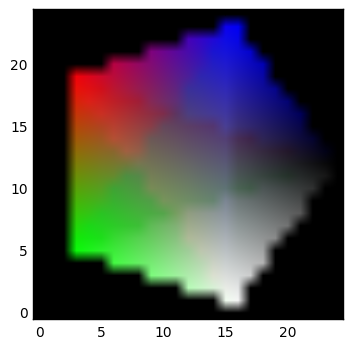

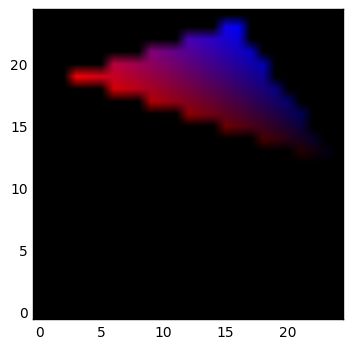

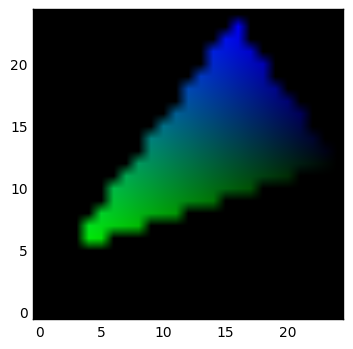

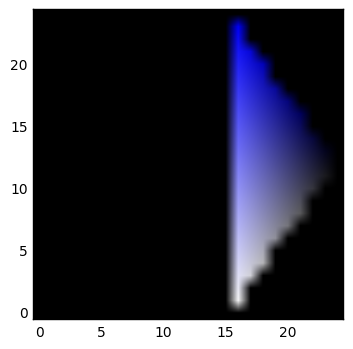

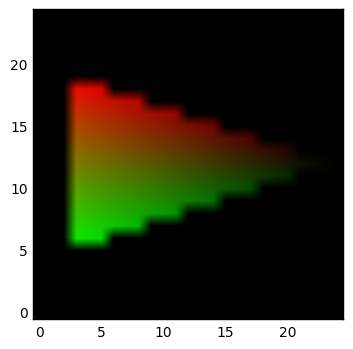

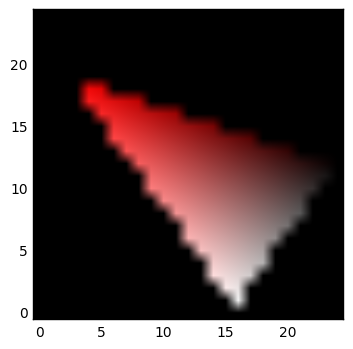

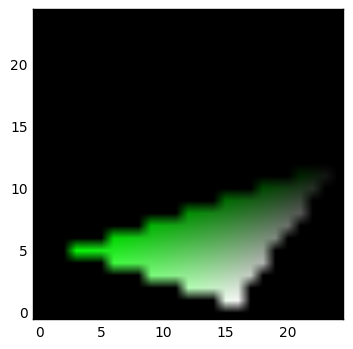

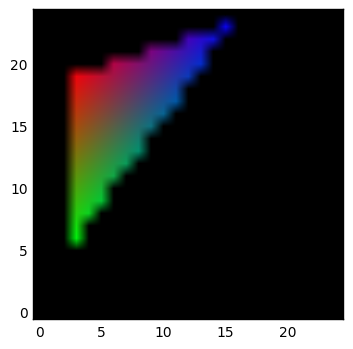

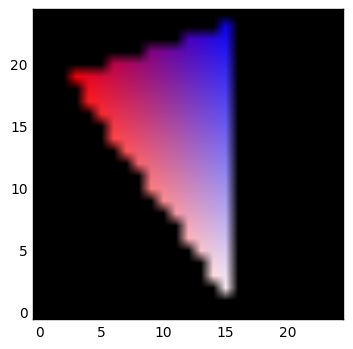

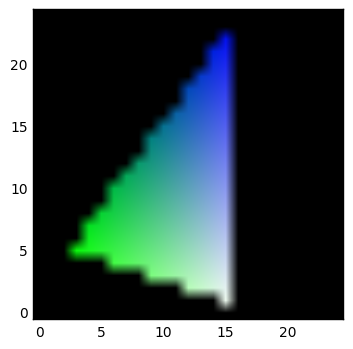

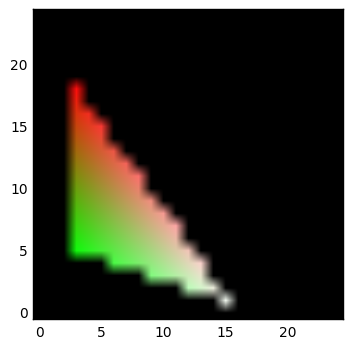

In [610]:
import itertools as itools

cmaps = []
def gen_cmap4(coords, values):
    for indices in itools.combinations(range(len(coords)), 3):
        cmaps.append(gen_cmap([coords[i] for i in indices], [values[i] for i in indices]))
    def cmap(point):
        outs = []
        for cmap in cmaps:
            res = cmap(point)
            if res is not None:
                outs.append(res)
#         print(outs)
        return np.mean(outs,axis=0)
    return cmap

def gen_cmap5(coords, values):
    max_dist = math.sqrt(2*100**2)
    def cmap(ps):
        if len(np.array(ps).shape) == 1:
            ps = [ps]
        distances = [[max(max_dist-la.norm(np.array(p)-np.array(c)), 0) for c in coords] for p in ps]
        norm_dist = [np.array(k)/sum(k) for k in distances]
        out = np.dot(norm_dist, values).clip(min=0.0, max=1.0)
#         print(ps, nps.tolist(), distances, out)
        return out.tolist()[0]
    return cmap

# cmap = gen_cmap4([[10,0], [100,0], [100,100], [10,100]], [(0,0,0), (0,0,1), (1,1,1), (1,0,0)])
# cmap = gen_cmap4([[95,0], [100,0], [0,100], [0,95]], [(0.75,0.75,1), (0,0,1), (1,0,0), (1,0.75,0.75)])
cmap = gen_cmap4([[50*(x+1) for x in p] for p in poly_corners(5)], [(0,0,0), (0,0,1), (1,0,0), (0,1,0), (1,1,1)])
# cmap = gen_cmap4([[50*(x+1) for x in p] for p in poly_corners(6)], [(0,0,1), (0,1,1), (0,1,0), (1,1,0), (1,0,0), (1,0,1)])

print(cmap((0,8)))

# print([x for x in itools.combinations(range(4),3)])
plot_cmap(cmap, filter= lambda x,y:True, foo=4)
for cmap in cmaps:
    plot_cmap(cmap, filter= lambda x,y:True, foo=4)

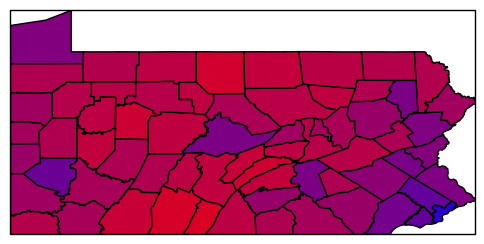

In [459]:
ax = plt.axes(projection=ccrs.PlateCarree())


# fig = plt.figure()#figsize=(8, 3))
# ax = fig.add_axes([0.05, 0.05, 0.85, 0.9], projection=ccrs.PlateCarree())
# ax2 = fig.add_axes([0.925, 0.15, 0.05, 0.7])

# ax = plt.axes(projection=ccrs.PlateCarree())
colormap = cm.get_cmap("Blues")
colormap.set_bad('orange')
colormap.set_over('g')
colormap.set_under('k')

# cmap = gen_cmap([[0,0], [100,0], [0,100]], [(0.5,0,0.5), (0,0,1), (1,0,0)])
# cmap = gen_cmap([[0,0], [100,0], [0,100]], [(0.5,0,0.5), (0,0,1), (1,0,0)])
# cmap = gen_cmap([[95,0], [100,0], [0,100], [0,95]], [(0,0,1), (0,0,1), (1,0,0), (1,0,0)])

# values = []
# for county,v in COUNTY_RESULTS.items():
#     meta = dict(COUNTY_RESULTS[k])
#     del meta["County"]
#     total = sum([int(f) for f in meta.values()])
#     vap = int(dict(VOTERS[k])["ALL"])
#     value = int(meta["TRUMP, DONALD J"])/sum([int(VOTERS[k]["REP"]), int(VOTERS[k]["OTH"]), int(VOTERS[k]["NOF"])])

for k,v in COUNTY_SHAPES.items():
    meta = dict(COUNTY_RESULTS[k])
    del meta["County"]
    total = sum([int(f) for f in meta.values()])
    point = [int(meta["CLINTON, HILLARY"])/total*100, int(meta["TRUMP, DONALD J"])/total*100]
    (x,y) = point
    if 95>x+y:
        print (k, x,y)
    color = cmap(point)
    cf = cfeature.ShapelyFeature([v], ccrs.PlateCarree())
    ax.add_feature(cf, facecolor=color)

ax.set_extent([-80.5198510000000027,-74.7215190000000007,39.7211469999999949,42.5160720000000012])
ax.set_aspect(1)

# cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=colormap, norm=colors.Normalize(vmin=0, vmax=1), extend='max')

plt.show()

In [409]:
PAPER = 0
MIXED = 1
DRE = 2

VOTE_METHOD = {
"Adams": PAPER,
"Allegheny": DRE,
"Armstrong": DRE,
"Beaver": DRE,
"Bedford": MIXED,
"Berks": DRE,
"Blair": DRE,
"Bradford": DRE,
"Bucks": DRE,
"Butler": DRE,
"Cambria": DRE,
"Cameron": DRE,
"Carbon": DRE,
"Centre": PAPER,
"Chester": MIXED,
"Clarion": DRE,
"Clearfield": DRE,
"Clinton": DRE,
"Columbia": MIXED,
"Crawford": DRE,
"Cumberland": MIXED,
"Dauphin": DRE,
"Delaware": DRE,
"Elk": DRE,
"Erie": DRE,
"Fayette": MIXED,
"Forest": DRE,
"Franklin": PAPER,
"Fulton": PAPER,
"Greene": DRE,
"Huntingdon": PAPER,
"Indiana": PAPER,
"Jefferson": DRE,
"Juniata": PAPER,
"Lackawanna": PAPER,
"Lancaster": MIXED,
"Lawrence": DRE,
"Lebanon": DRE,
"Lehigh": DRE,
"Luzerne": MIXED,
"Lycoming": DRE,
"Mckean": DRE,
"Mercer": DRE,
"Mifflin": PAPER,
"Monroe": DRE,
"Montgomery": DRE,
"Montour": PAPER,
"Northampton": DRE,
"Northumberland": DRE,
"Perry": DRE,
"Philadelphia": DRE,
"Pike": DRE,
"Potter": DRE,
"Schuylkill": DRE,
"Snyder": PAPER,
"Somerset": DRE,
"Sullivan": DRE,
"Susquehanna": PAPER,
"Tioga": DRE,
"Union": DRE,
"Venango": DRE,
"Warren": DRE,
"Washington": DRE,
"Wayne": PAPER,
"Westmoreland": MIXED,
"Wyoming": DRE,
"York": DRE
}

-2.45373136105


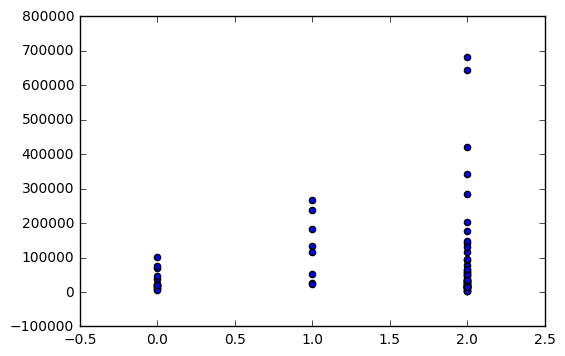

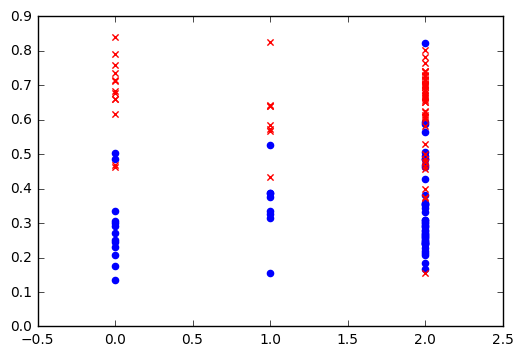

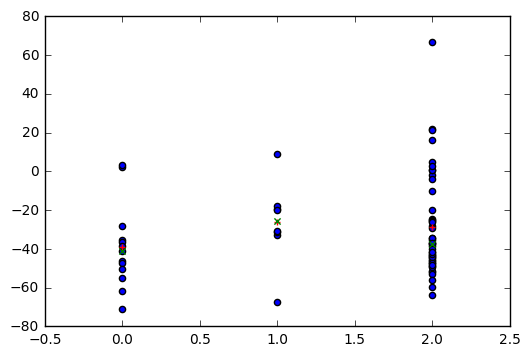

In [429]:
counties = VOTE_METHOD.keys()
x = [VOTE_METHOD[c] for c in counties]
totals = []
clinton = []
trump = []
delta = []
for c in counties:
    meta = dict(COUNTY_RESULTS[c])
    del meta["County"]
    total = sum([int(f) for f in meta.values()])
    totals.append(total)
    clinton.append(int(meta[CLINTON])/total)
    trump.append(int(meta[TRUMP])/total)
    delta.append((clinton[-1]-trump[-1])*100)
plt.figure()
plt.scatter(x,y)
plt.figure()
plt.scatter(x,clinton, color='blue')
plt.scatter(x,trump, color='red', marker='x')
plt.figure()
plt.scatter(x,delta)
d = np.array(delta)
k = np.array(x)

means_x = list(set(x))
means = [stat.mean(d[k==i]) for i in means_x]
medians = [stat.median(d[k==i]) for i in means_x]
plt.scatter(means_x, means, marker='+', color='red')
plt.scatter(means_x, medians, marker='x', color='green')
print(means[2]-means[1])
plt.show()

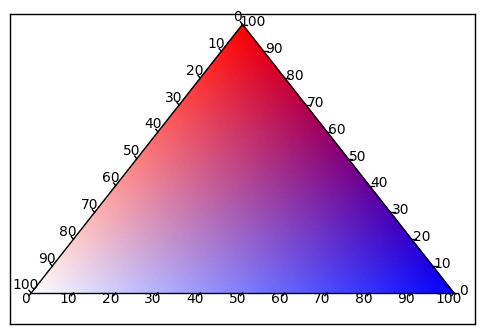

In [471]:
scale=100

data = dict()
for (i, j, k) in simplex_iterator(scale):
    data[(i, j, k)] = cmap((i,j))

figure, tax = ternary.figure(scale=scale)
tax.heatmap(data, style="triangular", colormap=False) # Allow colors as rgba tuples
tax.boundary()

tax.ticks(axis='lbr', multiple=10, linewidth=1)
# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

plt.show()